In [1]:
# ! pip install tweepy
# ! pip install textblob 
# ! pip install wordcloud

In [2]:
import pandas as pd
from datetime import datetime
import nltk
# Import Dependencies 
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/rubyrose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rubyrose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from nltk.tokenize import word_tokenize
from string import punctuation 

In [19]:
import tweepy
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression

In [20]:
csv_file = "../Twint/AMZN_joop.csv"
csv_GOOG = "../Twint/GOOG_joop.csv"
csv_JNJ = "../Twint/JNJ_joop.csv"
csv_PFE = "../Twint/PFE_joop.csv"
csv_TSLA = "../Twint/TSLA_joop.csv"
csv_MRNA = "../Twint/MRNA_joop.csv"
stock_csv_AMZN = "../hourslystockdata/AMZNhour.csv"
stock_csv_GOOG = "../hourslystockdata/GOOGhour.csv"
stock_csv_JNJ = "../hourslystockdata/JNJhour.csv"
stock_csv_PFE = "../hourslystockdata/PFEhour.csv"
stock_csv_TSLA = "../hourslystockdata/TSLAhour.csv"
stock_csv_MRNA = "../hourslystockdata/MRNAhour.csv"

In [21]:
AMZN_data_df = pd.read_csv(csv_file)
GOOG_data_df = pd.read_csv(csv_GOOG)
JNJ_data_df = pd.read_csv(csv_JNJ)
PFE_data_df = pd.read_csv(csv_PFE)
TSLA_data_df = pd.read_csv(csv_TSLA)
MRNA_data_df = pd.read_csv(csv_MRNA)
stock_AMZN_df = pd.read_csv(stock_csv_AMZN)
stock_GOOG_df = pd.read_csv(stock_csv_GOOG)
stock_JNJ_df = pd.read_csv(stock_csv_JNJ)
stock_PFE_df = pd.read_csv(stock_csv_PFE)
stock_TSLA_df = pd.read_csv(stock_csv_TSLA)
stock_MRNA_df = pd.read_csv(stock_csv_MRNA)
stock_AMZN_df["Datetime"] = stock_AMZN_df.Date + " " + stock_AMZN_df.Time
stock_AMZN_df.Datetime = pd.to_datetime(stock_AMZN_df.Datetime)
stock_AMZN_df.set_index("Datetime", inplace=True)
stock_AMZN_df.head()

,Date,Time,Open,High,Low,Close
Datetime,,,,,,
2021-08-18 00:00:00,8/18/2021,0:00,3250.0,3250.00,3250.0,3250.0
2021-08-18 01:00:00,8/18/2021,1:00:00,3250.0,3250.00,3250.0,3250.0
2021-08-18 02:00:00,8/18/2021,2:00:00,3250.0,3250.00,3250.0,3250.0
2021-08-18 03:00:00,8/18/2021,3:00:00,3250.0,3250.00,3250.0,3250.0
2021-08-18 04:00:00,8/18/2021,4:00:00,3246.5,3248.35,3245.2,3247.0


In [22]:
new_AMZN_data_df = AMZN_data_df[['date',
                                   'time',
                                   'username',
                                   'tweet',
                                   'hashtags',
                                   'cashtags']].copy()

new_GOOG_data_df = GOOG_data_df[['date',
                                   'time',
                                   'username',
                                   'tweet',
                                   'hashtags',
                                   'cashtags']].copy()

new_JNJ_data_df = JNJ_data_df[['date',
                                   'time',
                                   'username',
                                   'tweet',
                                   'hashtags',
                                   'cashtags']].copy()

new_PFE_data_df = PFE_data_df[['date',
                                   'time',
                                   'username',
                                   'tweet',
                                   'hashtags',
                                   'cashtags']].copy()

new_TSLA_data_df = TSLA_data_df[['date',
                                   'time',
                                   'username',
                                   'tweet',
                                   'hashtags',
                                   'cashtags']].copy()

new_MRNA_data_df = MRNA_data_df[['date',
                                   'time',
                                   'username',
                                   'tweet',
                                   'hashtags',
                                   'cashtags']].copy()
new_MRNA_data_df.head(n=100)

,date,time,username,tweet,hashtags,cashtags
0,2021-08-21,16:59:02,cashk3tchum,$pfe &amp; $mrna on Monday,[],"['pfe', 'mrna']"
1,2021-08-21,16:56:29,anchieiji2,$BNTX $MRNA おはようございます😃今日もNHKで23:30から放送されますね。こ...,[],"['bntx', 'mrna']"
2,2021-08-21,16:54:20,luego85781348,@toadwatcher1 @StockMKTNewz $MRNA is overvalue...,[],['mrna']
3,2021-08-21,16:45:48,zavalalol1,@KeepIt1K4L Pump and dumped $MRNA LMAO,[],['mrna']
4,2021-08-21,16:31:44,jpatrades,Me to all the bears still calling for the top ...,[],"['ttd', 'rblx', 'amc', 'ddd', 'mvst', 'gme', '..."
...,...,...,...,...,...,...
95,2021-08-21,08:14:43,apex_8bit,names on watch this week for the short side: ...,[],"['mrna', 'ttd', 'futu', 'abnb', 'roku', 'czr',..."
96,2021-08-21,08:09:23,sentivcapital,Breakthrough infections with mRNA 1st gen vacc...,[],"['pfe', 'mrna', 'nvax']"
97,2021-08-21,08:05:27,lucasva62548032,Real price will come out soon '; Follow price...,[],"['jd', 'bp', 'ssy', 'tsla', 'mu', 'c', 'kmi', ..."
98,2021-08-21,08:04:46,prasant56069147,$mrna Real price will come out soon; Follow ...,[],['mrna']


In [23]:
new_AMZN_data_df.dtypes

date        object
time        object
username    object
tweet       object
hashtags    object
cashtags    object
dtype: object

In [24]:
new_AMZN_data_df["Datetime"] = new_AMZN_data_df.date + " " + new_AMZN_data_df.time
new_AMZN_data_df.Datetime =  pd.to_datetime(new_AMZN_data_df.Datetime)
#new_AMZN_data_df["hour"] =  new_AMZN_data_df.Datetime.datetime.round("H").datetime.hour

In [25]:
new_AMZN_data_df["Datetime"] = new_AMZN_data_df.Datetime.dt.round('H')
new_AMZN_data_df.head(n=50)

,date,time,username,tweet,hashtags,cashtags,Datetime
0,2021-08-21,16:53:00,hectorcannabis,@VirginTraderGal Check out Amazon history sinc...,[],"['amzn', 'amzn', 'hmbl']",2021-08-21 17:00:00
1,2021-08-21,16:51:35,stoxdox,"@MikeZaccardi $AMZN P/S of 3.7x, however, Amaz...",[],"['amzn', 'wmt', 'fdx', 'kr']",2021-08-21 17:00:00
2,2021-08-21,16:51:06,davesf1235,@WOLF_Financial $ADBE $AAPL $AMZN $NVDA. Held...,[],"['adbe', 'aapl', 'amzn', 'nvda', 'nvda']",2021-08-21 17:00:00
3,2021-08-21,16:45:20,askwarrenbuffet,$WPMLF Will Confirm That Reverse Merger Discus...,[],"['wpmlf', 'tsla', 'kgc', 'dnr', 'axp', 'acrl',...",2021-08-21 17:00:00
4,2021-08-21,16:42:12,finapse_24_7,[Last 2 Hours] Stocks trending among elite #f...,"['fintwit', 'investing', 'stocks', 'wallstreet...","['tsla', 'fulc', 'ocgn', 'roku', 'amzn', 'sos']",2021-08-21 17:00:00
5,2021-08-21,16:40:33,mukund,@FabSueBowman I am sticking to well known seco...,[],"['aapl', 'amzn']",2021-08-21 17:00:00
6,2021-08-21,16:39:40,stocktalks21,@PelotonHolder @plantmath1 If $AMZN dumps any ...,[],['amzn'],2021-08-21 17:00:00
7,2021-08-21,16:31:44,jpatrades,Me to all the bears still calling for the top ...,[],"['ttd', 'rblx', 'amc', 'ddd', 'mvst', 'gme', '...",2021-08-21 17:00:00
8,2021-08-21,16:29:14,talkmarkets,"For Hedge Funds, This Is The Worst 6 Months Si...",[],"['incy', 'brk.b', 'ma', 'mchi', 'tdg', 'v', 'w...",2021-08-21 16:00:00
9,2021-08-21,16:28:15,trendtrader007,i missed out on $aapl and $amzn and $nvda but ...,[],"['aapl', 'amzn', 'nvda', 'googl', 'cmg', 'vmw'...",2021-08-21 16:00:00


In [26]:
#stock_AMZN_df.Date = pd.to_datetime(stock_AMZN_df.Date)
#stock_GOOG_df.Date = pd.to_datetime(stock_GOOG_df.Date)
#stock_JNJ_df.Date = pd.to_datetime(stock_JNJ_df.Date)
#stock_PFE_df.Date = pd.to_datetime(stock_PFE_df.Date)
#stock_TSLA_df.Date = pd.to_datetime(stock_TSLA_df.Date)
#stock_MRNA_df.Date = pd.to_datetime(stock_MRNA_df.Date)

In [27]:
#new_AMZN_data_df['date'] = pd.to_datetime(new_AMZN_data_df.date)
#new_GOOG_data_df['date'] = pd.to_datetime(new_GOOG_data_df.date)
#new_JNJ_data_df['date'] = pd.to_datetime(new_JNJ_data_df.date)
#new_PFE_data_df['date'] = pd.to_datetime(new_PFE_data_df.date)
#new_TSLA_data_df['date'] = pd.to_datetime(new_TSLA_data_df.date)
#new_MRNA_data_df['date'] = pd.to_datetime(new_MRNA_data_df.date)

In [28]:
new_AMZN_data_df.dtypes

date                object
time                object
username            object
tweet               object
hashtags            object
cashtags            object
Datetime    datetime64[ns]
dtype: object

In [29]:
new_AMZN_data_df = new_AMZN_data_df[(new_AMZN_data_df['date'] > '2021-08-17') & (new_AMZN_data_df['date'] <= '2021-08-20')]
new_GOOG_data_df = new_GOOG_data_df[(new_GOOG_data_df['date'] > '2021-08-17') & (new_GOOG_data_df['date'] <= '2021-08-20')]
new_JNJ_data_df = new_JNJ_data_df[(new_JNJ_data_df['date'] > '2021-08-17') & (new_JNJ_data_df['date'] <= '2021-08-20')]
new_PFE_data_df = new_PFE_data_df[(new_PFE_data_df['date'] > '2021-08-17') & (new_PFE_data_df['date'] <= '2021-08-20')]
new_TSLA_data_df = new_TSLA_data_df[(new_TSLA_data_df['date'] > '2021-08-17') & (new_TSLA_data_df['date'] <= '2021-08-20')]
new_MRNA_data_df = new_MRNA_data_df[(new_MRNA_data_df['date'] > '2021-08-17') & (new_MRNA_data_df['date'] <= '2021-08-20')]
new_AMZN_data_df

,date,time,username,tweet,hashtags,cashtags,Datetime
382,2021-08-20,23:59:02,luthejp,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,[],"['bigc', 'shop', 'amzn']",2021-08-21 00:00:00
383,2021-08-20,23:54:01,shortvolumes,Short sale volume (not short interest) for $ET...,[],"['etsy', 'amzn', 'ebay']",2021-08-21 00:00:00
384,2021-08-20,23:44:27,ishikawatrader,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,"['資産総額', 'セゾン投信', 'ひふみ投信', '賢明なる投資家', '懸命なる投資家...","['msft', 'shop', 'amzn', 'tsla', 'okta', 'sq',...",2021-08-21 00:00:00
385,2021-08-20,23:34:06,tradediary10,@tastytraderMike Just short $AMZN when its gre...,[],"['amzn', 'qqq']",2021-08-21 00:00:00
386,2021-08-20,23:29:50,mytldr,@ultimatejingle What bull market? - Fellow $A...,[],['amzn'],2021-08-20 23:00:00
...,...,...,...,...,...,...,...
4217,2021-08-18,01:06:17,newsfilterio,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,[],"['amzn', 'tsla']",2021-08-18 01:00:00
4218,2021-08-18,00:56:00,prolifictraders,“A stock broker is one who invests other peopl...,['investing'],"['aapl', 'msft', 'goog', 'googl', 'amzn', 'fb'...",2021-08-18 01:00:00
4219,2021-08-18,00:54:48,finapse_24_7,[Last 24 Hours] Stocks trending among elite #...,"['fintwit', 'investing', 'stocks', 'wallstreet...","['vrpx', 'tsla', 'se', 'amzn', 'aapl', 'mrna',...",2021-08-18 01:00:00
4220,2021-08-18,00:13:05,multibaggeranil,@TomGardnerFool $AMZN $GOOGL $NOW $FB $TEAM ...,[],"['amzn', 'googl', 'now', 'fb', 'team', 'zi', '...",2021-08-18 00:00:00


In [30]:
new_AMZN_data_df.set_index("Datetime", inplace = True)
new_AMZN_data_df

,date,time,username,tweet,hashtags,cashtags
Datetime,,,,,,
2021-08-21 00:00:00,2021-08-20,23:59:02,luthejp,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,[],"['bigc', 'shop', 'amzn']"
2021-08-21 00:00:00,2021-08-20,23:54:01,shortvolumes,Short sale volume (not short interest) for $ET...,[],"['etsy', 'amzn', 'ebay']"
2021-08-21 00:00:00,2021-08-20,23:44:27,ishikawatrader,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,"['資産総額', 'セゾン投信', 'ひふみ投信', '賢明なる投資家', '懸命なる投資家...","['msft', 'shop', 'amzn', 'tsla', 'okta', 'sq',..."
2021-08-21 00:00:00,2021-08-20,23:34:06,tradediary10,@tastytraderMike Just short $AMZN when its gre...,[],"['amzn', 'qqq']"
2021-08-20 23:00:00,2021-08-20,23:29:50,mytldr,@ultimatejingle What bull market? - Fellow $A...,[],['amzn']
...,...,...,...,...,...,...
2021-08-18 01:00:00,2021-08-18,01:06:17,newsfilterio,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,[],"['amzn', 'tsla']"
2021-08-18 01:00:00,2021-08-18,00:56:00,prolifictraders,“A stock broker is one who invests other peopl...,['investing'],"['aapl', 'msft', 'goog', 'googl', 'amzn', 'fb'..."
2021-08-18 01:00:00,2021-08-18,00:54:48,finapse_24_7,[Last 24 Hours] Stocks trending among elite #...,"['fintwit', 'investing', 'stocks', 'wallstreet...","['vrpx', 'tsla', 'se', 'amzn', 'aapl', 'mrna',..."


In [31]:
stock_AMZN_df = stock_AMZN_df.iloc[::-1]
stock_GOOG_df = stock_GOOG_df.iloc[::-1]
stock_JNJ_df = stock_JNJ_df.iloc[::-1]
stock_PFE_df = stock_PFE_df.iloc[::-1]
stock_TSLA_df = stock_TSLA_df.iloc[::-1]
stock_MRNA_df = stock_MRNA_df.iloc[::-1]


In [32]:
combined_AMZN = new_AMZN_data_df.join(stock_AMZN_df, on ="Datetime")
combined_AMZN
amzn_tweet['Close'] = combined_AMZN.Close
update_amzn= amzn_tweet.dropna()
update_amzn

NameError: name 'amzn_tweet' is not defined

In [33]:
new_AMZN_data_df


,date,time,username,tweet,hashtags,cashtags
Datetime,,,,,,
2021-08-21 00:00:00,2021-08-20,23:59:02,luthejp,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,[],"['bigc', 'shop', 'amzn']"
2021-08-21 00:00:00,2021-08-20,23:54:01,shortvolumes,Short sale volume (not short interest) for $ET...,[],"['etsy', 'amzn', 'ebay']"
2021-08-21 00:00:00,2021-08-20,23:44:27,ishikawatrader,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,"['資産総額', 'セゾン投信', 'ひふみ投信', '賢明なる投資家', '懸命なる投資家...","['msft', 'shop', 'amzn', 'tsla', 'okta', 'sq',..."
2021-08-21 00:00:00,2021-08-20,23:34:06,tradediary10,@tastytraderMike Just short $AMZN when its gre...,[],"['amzn', 'qqq']"
2021-08-20 23:00:00,2021-08-20,23:29:50,mytldr,@ultimatejingle What bull market? - Fellow $A...,[],['amzn']
...,...,...,...,...,...,...
2021-08-18 01:00:00,2021-08-18,01:06:17,newsfilterio,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,[],"['amzn', 'tsla']"
2021-08-18 01:00:00,2021-08-18,00:56:00,prolifictraders,“A stock broker is one who invests other peopl...,['investing'],"['aapl', 'msft', 'goog', 'googl', 'amzn', 'fb'..."
2021-08-18 01:00:00,2021-08-18,00:54:48,finapse_24_7,[Last 24 Hours] Stocks trending among elite #...,"['fintwit', 'investing', 'stocks', 'wallstreet...","['vrpx', 'tsla', 'se', 'amzn', 'aapl', 'mrna',..."


In [34]:
# date_format = '%m/%d/%y'
# new_AMZN_data_df = input('date:')
# new_AMZN_data_df = datetime.strptime(new_AMZN_data_df,date_format)

# if (datetime.strptime("8/20/2021", date_format) <= new_AMZN_data_df < datetime.strptime("8/18/2021", date_format)):

In [35]:
new_AMZN_data_df.to_csv('./cleaned_data/AMZN_clean_data.csv')
new_GOOG_data_df.to_csv('./cleaned_data/GOOG_clean_data.csv')
new_JNJ_data_df.to_csv('./cleaned_data/JNJ_clean_data.csv')
new_PFE_data_df.to_csv('./cleaned_data/PFE_clean_data.csv')
new_TSLA_data_df.to_csv('./cleaned_data/TSLA_clean_data.csv')
new_MRNA_data_df.to_csv('./cleaned_data/MRNA_clean_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: './cleaned_data/AMZN_clean_data.csv'

In [36]:
new_AMZN_data_df[['tweet', 'username', 'date','time']]

,tweet,username,date,time
Datetime,,,,
2021-08-21 00:00:00,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,luthejp,2021-08-20,23:59:02
2021-08-21 00:00:00,Short sale volume (not short interest) for $ET...,shortvolumes,2021-08-20,23:54:01
2021-08-21 00:00:00,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,ishikawatrader,2021-08-20,23:44:27
2021-08-21 00:00:00,@tastytraderMike Just short $AMZN when its gre...,tradediary10,2021-08-20,23:34:06
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,mytldr,2021-08-20,23:29:50
...,...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,newsfilterio,2021-08-18,01:06:17
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,prolifictraders,2021-08-18,00:56:00
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,finapse_24_7,2021-08-18,00:54:48


# AMZN - Sentiment Analysis

In [38]:
#amzn_tweet= new_AMZN_data_df[['tweet', 'username', 'date','time']]
amzn_tweet= new_AMZN_data_df[['tweet','username', 'date', 'time']]
amzn_tweet
amzn_tweet['Close'] = combined_AMZN.Close
update_amzn= amzn_tweet.dropna()
update_amzn

<ipython-input-38-7a3e6de5fb9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_tweet['Close'] = combined_AMZN.Close


,tweet,username,date,time,Close
Datetime,,,,,
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,mytldr,2021-08-20,23:29:50,3201.05
2021-08-20 23:00:00,"@tpsojda @EpicGames Indeed, but $MSFT could do...",viggy_krishnan,2021-08-20,23:24:56,3201.05
2021-08-20 23:00:00,Amazon | $AMZN AMZN - 3081 / 2897 - by 30 Aug...,trader_blitz,2021-08-20,23:21:01,3201.05
2021-08-20 23:00:00,EC減速は $AMZN からの流れだが、これまでコロナ特需だった小売も前年比で減速してる。具...,eyasu2008_0131,2021-08-20,23:17:05,3201.05
2021-08-20 23:00:00,世界の時価総額ランキング 1位 アップル $AAPL 2兆4500億ドル 2位 マイク...,pb56408748,2021-08-20,23:16:01,3201.05
...,...,...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,newsfilterio,2021-08-18,01:06:17,3250.00
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,prolifictraders,2021-08-18,00:56:00,3250.00
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,finapse_24_7,2021-08-18,00:54:48,3250.00


In [ ]:
# class PreProcessTweets:
#     def __init__(self):
#         self._stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
#     def processTweets(self, list_of_tweets):
#         processedTweets=[]
#         for tweet in list_of_tweets:
#             processedTweets.append((self._processTweet(tweet["text"]),tweet["label"]))
#         return processedTweets
    
#     def _processTweet(self, tweet):
#         tweet = tweet.lower() # convert text to lower-case
#         tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
#         tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
#         tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
#         tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
#         return [word for word in tweet if word not in self._stopwords]

In [ ]:
# def buildVocabulary(preprocessedTrainingData):
#     all_words = []
    
#     for (words, sentiment) in preprocessedTrainingData:
#         all_words.extend(words)

#     wordlist = amzn_tweet.nltk.FreqDist(all_words)
#     word_features = wordlist.keys()
    
#     return word_features

In [ ]:
# Clean the Text 

# Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions 
    text= re.sub(r'#', '', text) # Remove the '#' symbol
    text= re.sub(r'RT[\s]+', "", text) #Remove RT
    text= re.sub(r'https?:\/\/\S+', "", text) # Remove the hyper link

    return text

#Cleaning the text 
amzn_tweet['tweet']= amzn_tweet['tweet'].apply(cleanTxt)
amzn_tweet

In [52]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns 
amzn_tweet['Subjectivity'] = amzn_tweet['tweet'].apply(getSubjectivity)
amzn_tweet['Polarity'] = amzn_tweet['tweet'].apply(getPolarity)

# Show the new dataframe with the new columns 
amzn_tweet

,tweet,username,date,time,Close,Subjectivity,Polarity
Datetime,,,,,,,
2021-08-21 00:00:00,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,luthejp,2021-08-20,23:59:02,NaN,0.000000,0.000000
2021-08-21 00:00:00,Short sale volume (not short interest) for $ET...,shortvolumes,2021-08-20,23:54:01,NaN,0.300000,0.000000
2021-08-21 00:00:00,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,ishikawatrader,2021-08-20,23:44:27,NaN,0.000000,0.000000
2021-08-21 00:00:00,@tastytraderMike Just short $AMZN when its gre...,tradediary10,2021-08-20,23:34:06,NaN,0.333333,-0.083333
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,mytldr,2021-08-20,23:29:50,3201.05,0.000000,0.000000
...,...,...,...,...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,newsfilterio,2021-08-18,01:06:17,3250.00,0.100000,-0.150000
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,prolifictraders,2021-08-18,00:56:00,3250.00,0.375000,-0.125000
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,finapse_24_7,2021-08-18,00:54:48,3250.00,0.288889,0.200000


In [ ]:
# Plot The Word Cloud 
amzn_allWords = ''.join([twts for twts in amzn_tweet['tweet']])
amzn_wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(amzn_allWords)

plt.imshow(amzn_wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [53]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
amzn_tweet['Analysis'] = amzn_tweet['Polarity'].apply(getAnalysis)
amzn_tweet['close'] = new_AMZN_data_df.Close   
# Show the dataframe 
amzn_tweet['close']

AttributeError: 'DataFrame' object has no attribute 'Close'

In [ ]:
# Print all of the positive tweets
# plt.figure(figsize=(8,6))
# for i in range(0, amzn_tweet['tweet'].shape[0]):
#     plt.scatter(amzn_tweet['Subjectivity'][i], amzn_tweet['Subjectivity'][i], color='Blue')
    
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [54]:
df_amzn_NP = amzn_tweet[['tweet','Subjectivity','Polarity']]
df_amzn_NP

,tweet,Subjectivity,Polarity
Datetime,,,
2021-08-21 00:00:00,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,0.000000,0.000000
2021-08-21 00:00:00,Short sale volume (not short interest) for $ET...,0.300000,0.000000
2021-08-21 00:00:00,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,0.000000,0.000000
2021-08-21 00:00:00,@tastytraderMike Just short $AMZN when its gre...,0.333333,-0.083333
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,0.000000,0.000000
...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,0.100000,-0.150000
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,0.375000,-0.125000
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,0.288889,0.200000


In [57]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
amzn_tweet['Analysis'] = amzn_tweet['Polarity'].apply(getAnalysis)
    
# Show the dataframe 
amzn_tweet

,tweet,username,date,time,Close,Subjectivity,Polarity,Analysis
Datetime,,,,,,,,
2021-08-21 00:00:00,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,luthejp,2021-08-20,23:59:02,NaN,0.000000,0.000000,Neutral
2021-08-21 00:00:00,Short sale volume (not short interest) for $ET...,shortvolumes,2021-08-20,23:54:01,NaN,0.300000,0.000000,Neutral
2021-08-21 00:00:00,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,ishikawatrader,2021-08-20,23:44:27,NaN,0.000000,0.000000,Neutral
2021-08-21 00:00:00,@tastytraderMike Just short $AMZN when its gre...,tradediary10,2021-08-20,23:34:06,NaN,0.333333,-0.083333,Negative
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,mytldr,2021-08-20,23:29:50,3201.05,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,newsfilterio,2021-08-18,01:06:17,3250.00,0.100000,-0.150000,Negative
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,prolifictraders,2021-08-18,00:56:00,3250.00,0.375000,-0.125000,Negative
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,finapse_24_7,2021-08-18,00:54:48,3250.00,0.288889,0.200000,Positive


NameError: name 'tsla_tweet' is not defined

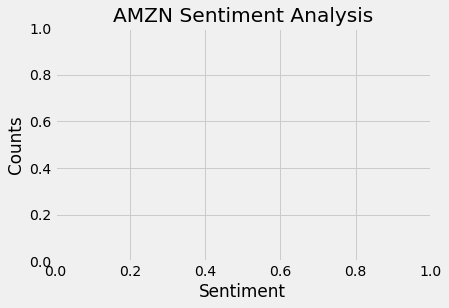

In [58]:
#Print all of the positive tweets
amzn_tweet['Analysis'].value_counts()

plt.title('AMZN Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tsla_tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()

# GOOGL - Sentiment Analysis

In [59]:
googl_tweet= new_GOOG_data_df[['username','tweet','date', 'time']]
googl_tweet

,username,tweet,date,time
105,briantycangco,There’s really something wrong with a biz rela...,2021-08-20,23:44:25
106,geldhoch2,Es läuft bei einem meiner Lieblinge $GOOG Way...,2021-08-20,23:31:23
107,asigismo,@yoda_money It varies by objective. Knowing fi...,2021-08-20,22:29:21
108,stock_market_a,$GOOG フォートナイト」のメーカーであるEpic GamesとGoogleの戦いは、最新...,2021-08-20,22:29:16
109,newsfilterio,"$37,923,106.28 of shares sold by Page Lawrence...",2021-08-20,22:07:56
...,...,...,...,...
813,newsfilterio,Why This Top-Performing Fund Calls Facebook ‘a...,2021-08-18,01:16:18
814,prolifictraders,“A stock broker is one who invests other peopl...,2021-08-18,00:56:00
815,wisdomofthetape,"We're still in an uptrend, so price swings to ...",2021-08-18,00:14:00
816,diamondoptions2,Free $QQQ analysis 🧠 #QQQ #Nasdaq #Nasdaq100 #...,2021-08-18,00:08:58


In [ ]:
# Clean the Text 

# Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions 
    text= re.sub(r'#', '', text) # Remove the '#' symbol
    text= re.sub(r'RT[\s]+', "", text) #Remove RT
    text= re.sub(r'https?:\/\/\S+', "", text) # Remove the hyper link

    return text

#Cleaning the text 
googl_tweet['tweet']= googl_tweet['tweet'].apply(cleanTxt)
googl_tweet

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns 
googl_tweet['Subjectivity'] = googl_tweet['tweet'].apply(getSubjectivity)
googl_tweet['Polarity'] = googl_tweet['tweet'].apply(getPolarity)

# Show the new dataframe with the new columns 
googl_tweet

In [ ]:
# Plot The Word Cloud 
googl_allWords = ''.join([twts for twts in googl_tweet['tweet']])
googl_wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(googl_allWords)

plt.imshow(googl_wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
googl_tweet['Analysis'] = googl_tweet['Polarity'].apply(getAnalysis)
    
# Show the dataframe 
googl_tweet

In [ ]:
#Print all of the positive tweets
googl_tweet['Analysis'].value_counts()

plt.title('GOOGL Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
googl_tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()

# JNJ - Sentiment Analysis

In [ ]:
jnj_tweet= new_JNJ_data_df[['username', 'tweet', 'date', 'time']]
jnj_tweet

In [ ]:
# Clean the Text 

# Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions 
    text= re.sub(r'#', '', text) # Remove the '#' symbol
    text= re.sub(r'RT[\s]+', "", text) #Remove RT
    text= re.sub(r'https?:\/\/\S+', "", text) # Remove the hyper link

    return text

#Cleaning the text 
jnj_tweet['tweet']= jnj_tweet['tweet'].apply(cleanTxt)
jnj_tweet

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns 
jnj_tweet['Subjectivity'] = jnj_tweet['tweet'].apply(getSubjectivity)
jnj_tweet['Polarity'] = jnj_tweet['tweet'].apply(getPolarity)

# Show the new dataframe with the new columns 
jnj_tweet

In [ ]:
# Plot The Word Cloud 
jnj_allWords = ''.join([twts for twts in jnj_tweet['tweet']])
jnj_wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(jnj_allWords)

plt.imshow(jnj_wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Create a function to compute the negative, neutral, and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
jnj_tweet['Analysis'] = jnj_tweet['Polarity'].apply(getAnalysis)
    
# Show the dataframe 
jnj_tweet

In [ ]:
#Print all of the positive tweets
jnj_tweet['Analysis'].value_counts()

plt.title('JNJ Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
jnj_tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()

# PFE - Sentiment Analysis

In [ ]:
pfe_tweet= new_PFE_data_df[['username', 'tweet', 'date', 'time']]
pfe_tweet

In [ ]:
# Clean the Text 

# Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions 
    text= re.sub(r'#', '', text) # Remove the '#' symbol
    text= re.sub(r'RT[\s]+', "", text) #Remove RT
    text= re.sub(r'https?:\/\/\S+', "", text) # Remove the hyper link

    return text

#Cleaning the text 
pfe_tweet['tweet']= pfe_tweet['tweet'].apply(cleanTxt)
pfe_tweet

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns 
pfe_tweet['Subjectivity'] = pfe_tweet['tweet'].apply(getSubjectivity)
pfe_tweet['Polarity'] = pfe_tweet['tweet'].apply(getPolarity)

# Show the new dataframe with the new columns 
pfe_tweet

In [ ]:
# Plot The Word Cloud 
pfe_allWords = ''.join([twts for twts in pfe_tweet['tweet']])
pfe_wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(pfe_allWords)

plt.imshow(pfe_wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
pfe_tweet['Analysis'] = pfe_tweet['Polarity'].apply(getAnalysis)
    
# Show the dataframe 
pfe_tweet

In [ ]:
#Print all of the positive tweets
pfe_tweet['Analysis'].value_counts()

plt.title('PFE Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
pfe_tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()

# TSLA - Sentiment Analysis

In [ ]:
tsla_tweet= new_TSLA_data_df[['username','tweet','date','time']]
tsla_tweet

In [ ]:
# Clean the Text 

# Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions 
    text= re.sub(r'#', '', text) # Remove the '#' symbol
    text= re.sub(r'RT[\s]+', "", text) #Remove RT
    text= re.sub(r'https?:\/\/\S+', "", text) # Remove the hyper link
    text= re.sub(r'_[A-Za-z0-9]+', '', text) # Remove '_'

    return text

#Cleaning the text 
tsla_tweet['tweet']= tsla_tweet['tweet'].apply(cleanTxt)
tsla_tweet

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns 
tsla_tweet['Subjectivity'] = tsla_tweet['tweet'].apply(getSubjectivity)
tsla_tweet['Polarity'] = tsla_tweet['tweet'].apply(getPolarity)

# Show the new dataframe with the new columns 
tsla_tweet

In [ ]:
# Plot The Word Cloud 
tsla_allWords = ''.join([twts for twts in tsla_tweet['tweet']])
tsla_wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(tsla_allWords)

plt.imshow(tsla_wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
tsla_tweet['Analysis'] = tsla_tweet['Polarity'].apply(getAnalysis)
    
# Show the dataframe 
tsla_tweet

In [ ]:
#Print all of the positive tweets
tsla_tweet['Analysis'].value_counts()

plt.title('TSLA Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tsla_tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()

# MRNA - Sentiment Analysis 

In [ ]:
mrna_tweet= new_MRNA_data_df[['username','tweet','date','time']]
mrna_tweet

In [ ]:
# Clean the Text 

# Create a function to clean the tweets
def cleanTxt(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions 
    text= re.sub(r'#', '', text) # Remove the '#' symbol
    text= re.sub(r'RT[\s]+', "", text) #Remove RT
    text= re.sub(r'https?:\/\/\S+', "", text) # Remove the hyper link

    return text

#Cleaning the text 
mrna_tweet['tweet']= mrna_tweet['tweet'].apply(cleanTxt)
mrna_tweet

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns 
mrna_tweet['Subjectivity'] = mrna_tweet['tweet'].apply(getSubjectivity)
mrna_tweet['Polarity'] = mrna_tweet['tweet'].apply(getPolarity)

# Show the new dataframe with the new columns 
mrna_tweet

In [ ]:
# Plot The Word Cloud 
mrna_allWords = ''.join([twts for twts in mrna_tweet['tweet']])
mrna_wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(mrna_allWords)

plt.imshow(mrna_wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute the negative, neutral, and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
mrna_tweet['Analysis'] = mrna_tweet['Polarity'].apply(getAnalysis)
    
# Show the dataframe 
mrna_tweet

In [ ]:
#Print all of the positive tweets
mrna_tweet['Analysis'].value_counts()

plt.title('Moderna Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
mrna_tweet['Analysis'].value_counts().plot(kind='bar')
plt.show()

# Regression Analysis


In [ ]:
amzn1= combined_AMZN.dropna()
amzn1[['username','tweet','Date', 'Time','Close']]


In [61]:
amzn_tweet

,tweet,username,date,time,Close,Subjectivity,Polarity,Analysis
Datetime,,,,,,,,
2021-08-21 00:00:00,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,luthejp,2021-08-20,23:59:02,NaN,0.000000,0.000000,Neutral
2021-08-21 00:00:00,Short sale volume (not short interest) for $ET...,shortvolumes,2021-08-20,23:54:01,NaN,0.300000,0.000000,Neutral
2021-08-21 00:00:00,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,ishikawatrader,2021-08-20,23:44:27,NaN,0.000000,0.000000,Neutral
2021-08-21 00:00:00,@tastytraderMike Just short $AMZN when its gre...,tradediary10,2021-08-20,23:34:06,NaN,0.333333,-0.083333,Negative
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,mytldr,2021-08-20,23:29:50,3201.05,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,newsfilterio,2021-08-18,01:06:17,3250.00,0.100000,-0.150000,Negative
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,prolifictraders,2021-08-18,00:56:00,3250.00,0.375000,-0.125000,Negative
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,finapse_24_7,2021-08-18,00:54:48,3250.00,0.288889,0.200000,Positive


In [62]:
# amzn_tweet["close"]= new_AMZN_data_df.Close

AttributeError: 'DataFrame' object has no attribute 'Close'

In [63]:
amzn_tweet["Close"] = combined_AMZN.Close

In [64]:
amzn_tweet

,tweet,username,date,time,Close,Subjectivity,Polarity,Analysis
Datetime,,,,,,,,
2021-08-21 00:00:00,2021年8月6日に行われた $BIGC (ビッグコマース)の四半期決算説明会和訳・翻訳をn...,luthejp,2021-08-20,23:59:02,NaN,0.000000,0.000000,Neutral
2021-08-21 00:00:00,Short sale volume (not short interest) for $ET...,shortvolumes,2021-08-20,23:54:01,NaN,0.300000,0.000000,Neutral
2021-08-21 00:00:00,【21年8月】＃資産総額 ＃セゾン投信 ＃ひふみ投信 ＃賢明なる投資家 ＃懸命なる投資家 ＃...,ishikawatrader,2021-08-20,23:44:27,NaN,0.000000,0.000000,Neutral
2021-08-21 00:00:00,@tastytraderMike Just short $AMZN when its gre...,tradediary10,2021-08-20,23:34:06,NaN,0.333333,-0.083333,Negative
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,mytldr,2021-08-20,23:29:50,3201.05,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,newsfilterio,2021-08-18,01:06:17,3250.00,0.100000,-0.150000,Negative
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,prolifictraders,2021-08-18,00:56:00,3250.00,0.375000,-0.125000,Negative
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,finapse_24_7,2021-08-18,00:54:48,3250.00,0.288889,0.200000,Positive


In [69]:
update_amzn
amzn_tweet['Open']= stock_AMZN_df.Open
amzn_tweet_drop= amzn_tweet.dropna()
amzn_tweet_drop

,tweet,username,date,time,Close,Subjectivity,Polarity,Analysis,Open
Datetime,,,,,,,,,
2021-08-20 23:00:00,@ultimatejingle What bull market? - Fellow $A...,mytldr,2021-08-20,23:29:50,3201.05,0.000000,0.000000,Neutral,3200.28
2021-08-20 23:00:00,"@tpsojda @EpicGames Indeed, but $MSFT could do...",viggy_krishnan,2021-08-20,23:24:56,3201.05,0.375000,-0.125000,Negative,3200.28
2021-08-20 23:00:00,Amazon | $AMZN AMZN - 3081 / 2897 - by 30 Aug...,trader_blitz,2021-08-20,23:21:01,3201.05,0.350000,-0.025000,Negative,3200.28
2021-08-20 23:00:00,EC減速は $AMZN からの流れだが、これまでコロナ特需だった小売も前年比で減速してる。具...,eyasu2008_0131,2021-08-20,23:17:05,3201.05,0.300000,0.000000,Neutral,3200.28
2021-08-20 23:00:00,世界の時価総額ランキング 1位 アップル $AAPL 2兆4500億ドル 2位 マイク...,pb56408748,2021-08-20,23:16:01,3201.05,0.000000,0.000000,Neutral,3200.28
...,...,...,...,...,...,...,...,...,...
2021-08-18 01:00:00,Jeff Bezos' Blue Origin Loses Lead Engineer Wo...,newsfilterio,2021-08-18,01:06:17,3250.00,0.100000,-0.150000,Negative,3250.00
2021-08-18 01:00:00,“A stock broker is one who invests other peopl...,prolifictraders,2021-08-18,00:56:00,3250.00,0.375000,-0.125000,Negative,3250.00
2021-08-18 01:00:00,[Last 24 Hours] Stocks trending among elite #...,finapse_24_7,2021-08-18,00:54:48,3250.00,0.288889,0.200000,Positive,3250.00


In [79]:
# Split the data x, y 
y= amzn_tweet_drop['Close']
x= amzn_tweet_drop[['Subjectivity','Open','Polarity']]

In [80]:
# Define the multiple Linear regression model 
linear_regression = LinearRegression()

In [81]:
# Fit the multiple Linear regression model 
linear_regression.fit(x,y)

LinearRegression()

# Split Data into Training and Test Set

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [94]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [95]:
y_pred= linear_regression.predict(x)

In [96]:
y_pred

array([3199.83687295, 3199.79815314, 3199.80929822, ..., 3241.43741599,
       3241.43956375, 3241.41720619])

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(y,y_pred)

73.34038311366001